https://github.com/doku/ipython_notebooks/blob/master/sketch_book/USA%20analysis.ipynb


INTRODUCTION:
Welcome, and thank you for applying for a position on the Undergraduate Statistics Association’s 's Projects Team for Spring 2017! 
In this short coding challenge, you will showcase your data cleaning, data visualization, and investigative techniques by operating on the files, "dataset1_s17.csv" and "dataset2_s17.csv". 
Below are three tasks to complete; please simply do your best in each, as not every applicant is expected to correctly answer every problem. The challenge in total should take no more than between 30 minutes to 2 hours to complete. You are welcome to use any programming language, packages, or platforms you are comfortable using.
As for submission, please submit a single PDF in your main application. The PDF should contain:
    * your clearly commented code
    * all generated plots, results, and models
    * your written interpretation of your results for each task
If you have any questions or concerns, about the committee itself or the contents of this challenge, please contact me at arun.ramamurthy@berkeley.edu. 
Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A:
This task deals with interpreting the structure of the dataset, "dataset1_s17.csv". 
1. What does each row represent? 
- Each row represent one entry of the dataset. These entry is likly representing students and their test score.

2. Are there any initial observations you can make about the dataset? This is free-form question; include any explanations or plots you feel help to answer this question.
- From the header, they are likely talking about students and their test score on an monthly interval. 

3. How many students are there in each grade? Include a plot that indicates these quantities clearly. 
- 
   

In [17]:
df = pd.read_csv("dataset1_s17.csv")
df.head()


,Student.ID,Month,Grade,Monthly.Reading.Score,Monthly.Math.Score,Color
0,100115087,9/1/2015,3,10.0,11,Yellow
1,100115087,10/1/2015,3,10.0,11,Green
2,100115087,1/1/2016,3,12.0,12,Green
3,100115087,2/1/2016,3,13.0,12,Green
4,100115087,3/1/2016,3,14.0,12,Green


In [24]:
dk = df.groupby("Grade").size()
dk


Grade
1        10668
2        10796
3         8368
4         5117
5         1998
K        10922
Pre-K     1694
dtype: int64

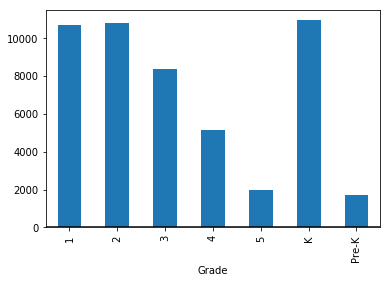

In [28]:
plt.figure()

dk.plot(kind='bar')
plt.axhline(0, color='k')

4. Suppose that there is a mistake in this dataset, that each student in 2nd Grade is actually in 1st Grade, and that each student in 1st Grade is actually in 2nd Grade. Plot as you did in the previous part, with these "mistakes" rectified. 
   (WARNING: Do NOT permanently modify the dataset in answering this question, as you will need the original dataset for the later tasks of this challenge)
   

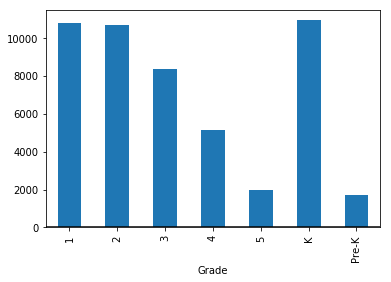

In [33]:
dk[0], dk[1] = dk[1], dk[0]

plt.figure()

dk.plot(kind='bar')
plt.axhline(0, color='k')


B:
This task deals with investigating the relationship between students' reading and math test scores in the dataset, "dataset1_s17.csv".
1. Begin by creating a simple scatterplot comparing each student's reading score for that month with their math score for that month. Each glyph, or dot, should correspond to exactly one row in the datatable. Interpret the results.


Month
1/1/2016     Axes(0.125,0.125;0.775x0.755)
10/1/2015    Axes(0.125,0.125;0.775x0.755)
11/1/2015    Axes(0.125,0.125;0.775x0.755)
12/1/2015    Axes(0.125,0.125;0.775x0.755)
2/1/2016     Axes(0.125,0.125;0.775x0.755)
3/1/2016     Axes(0.125,0.125;0.775x0.755)
4/1/2016     Axes(0.125,0.125;0.775x0.755)
5/1/2016     Axes(0.125,0.125;0.775x0.755)
6/1/2016     Axes(0.125,0.125;0.775x0.755)
9/1/2015     Axes(0.125,0.125;0.775x0.755)
dtype: object

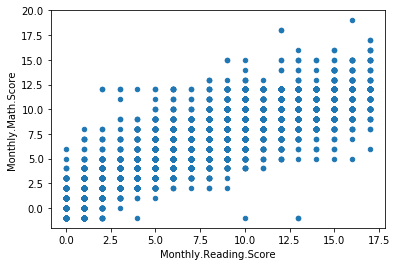

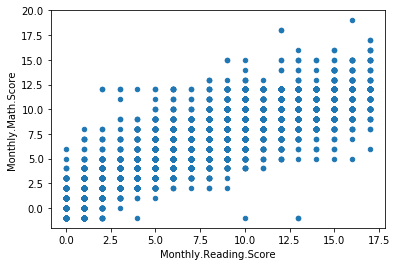

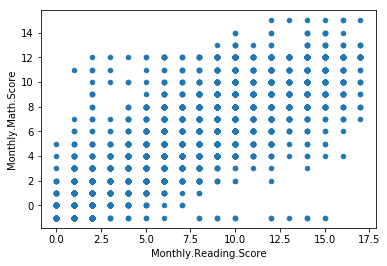

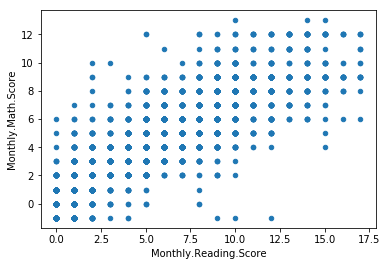

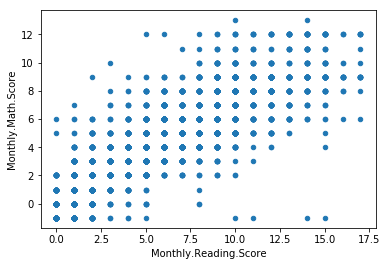

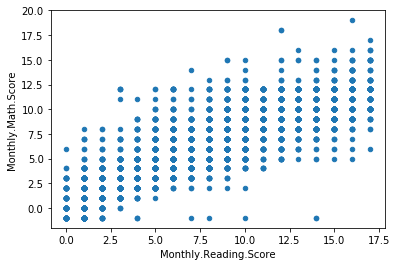

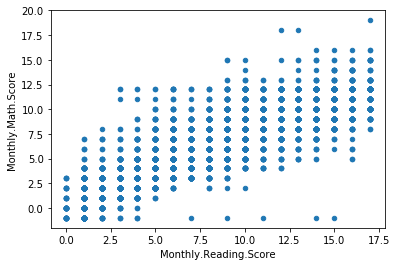

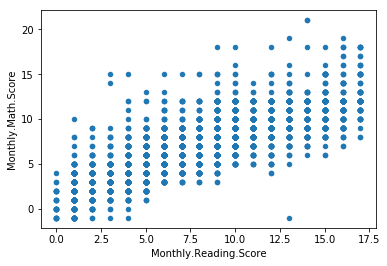

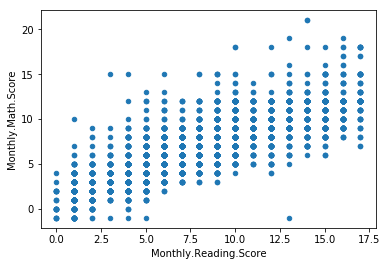

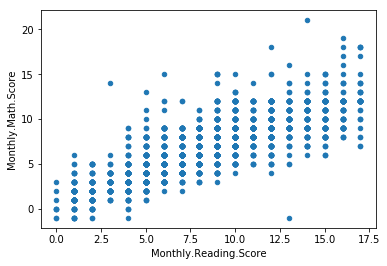

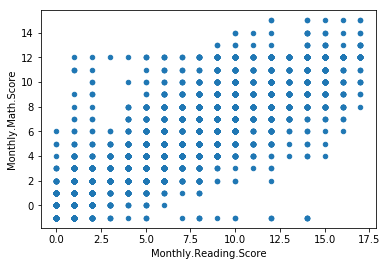

In [3]:
dk = pd.read_csv("dataset1_s17.csv")
dt = dk.groupby("Month")
plt.figure()
dt.plot.scatter(x= 'Monthly.Reading.Score', y='Monthly.Math.Score')

There seems to be a linear relationship between reading and math. The spread is huge, no conclusions can be drawn. In 2016, the spread isn't as wide. 

## 2. Repeat the previous part, but color each dot based on the corresponding value in the Color column. Again, interpret the results. What do you think Color represents?

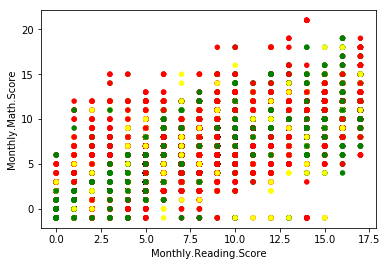

In [4]:
plt.figure()
dk.plot.scatter(x= 'Monthly.Reading.Score', y='Monthly.Math.Score', c= dk["Color"])


There's not much you can interpret. The dots all overlap each other. It may be cousidence that red seems to be on the edge of spread. 


## 3. Craft a model that takes a student's reading score, and predicts that student's math score. Craft another model that takes a student's math score, and predicts that student's reading score. How do these models differ, if at all? Why?

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

dat = dk.loc[:,['Monthly.Math.Score','Monthly.Reading.Score']]

reg.fit(dat)


ImportError: No module named 'scipy'

C:
This task deals with using the dataset, "dataset2_s17.csv" in conjunction with "dataset1_s17.csv".
1. Begin by joining the two datasets by Student ID, into a single dataset.
2. We wish to investigate if teachers scored their students differently based on their gender. Please craft any code, plots, and tests that help to answer this question, and clearly explain your steps and interpretations. 